In [1]:
from attacktree.models import Action, Block, Detect, Discovery, Edge, Root, Goal
from attacktree.renderer import Renderer

root = Root("Signed up to Azure")
goal = Goal("Access to other tenants data")

In [2]:
# Direct path
whoC = root.add(Action("Deploy WhoC container to view runtime"))
omgRunC = whoC.discover("OLD runc version 1.0.0-r2")
exploit = omgRunC.action("Deploy exploit container for CVE-2019-5736")
shell = Root("Reverse shell on worker node")
exploit.add(shell)
creds = shell.discover("Read kubelet credentials from disk")

describePods = creds.action("Call KubeAPI describe pods")
pods = describePods.discover("100+ customer pods on 120 nodes\nEach customer has their own namespace")
versions = describePods.discover("OLD Kubernetes versions v1.8.4, v1.9.10, v1.10.9")
anonymousAccess = describePods.discover("Kubelets run with anonymous access")

otherKubelet = anonymousAccess.action("Access another customer's kubelet")
blockedbyFirewall = otherKubelet.block("Blocked by firewall", implemented=True)

cve = versions.discover("CVE-2018-1002102 kube-api follows 302 redirect")
exploit2 = cve.action("Attempt to redirect to kube-api pod")
fail = exploit2.block("ACI uses a 'bridge' POD which is not impacted by this issue",implemented=True)

interesting = exploit2.discover("ServiceAccount in 'AuthorizationHeader' of Exec requests")
bridgeToken = interesting.discover("Decoded JWT shows this token belongs to 'bridge' service")

accessReview = bridgeToken.action("Call SelfSubjectAccessReview with 'bridge' token")
privs = accessReview.discover("Cluster-wide permissions\npods/exec privilege")

gameOver = privs.action("Exec into shell on kube-API")
gameOver.add(goal)


Goal:4374765040

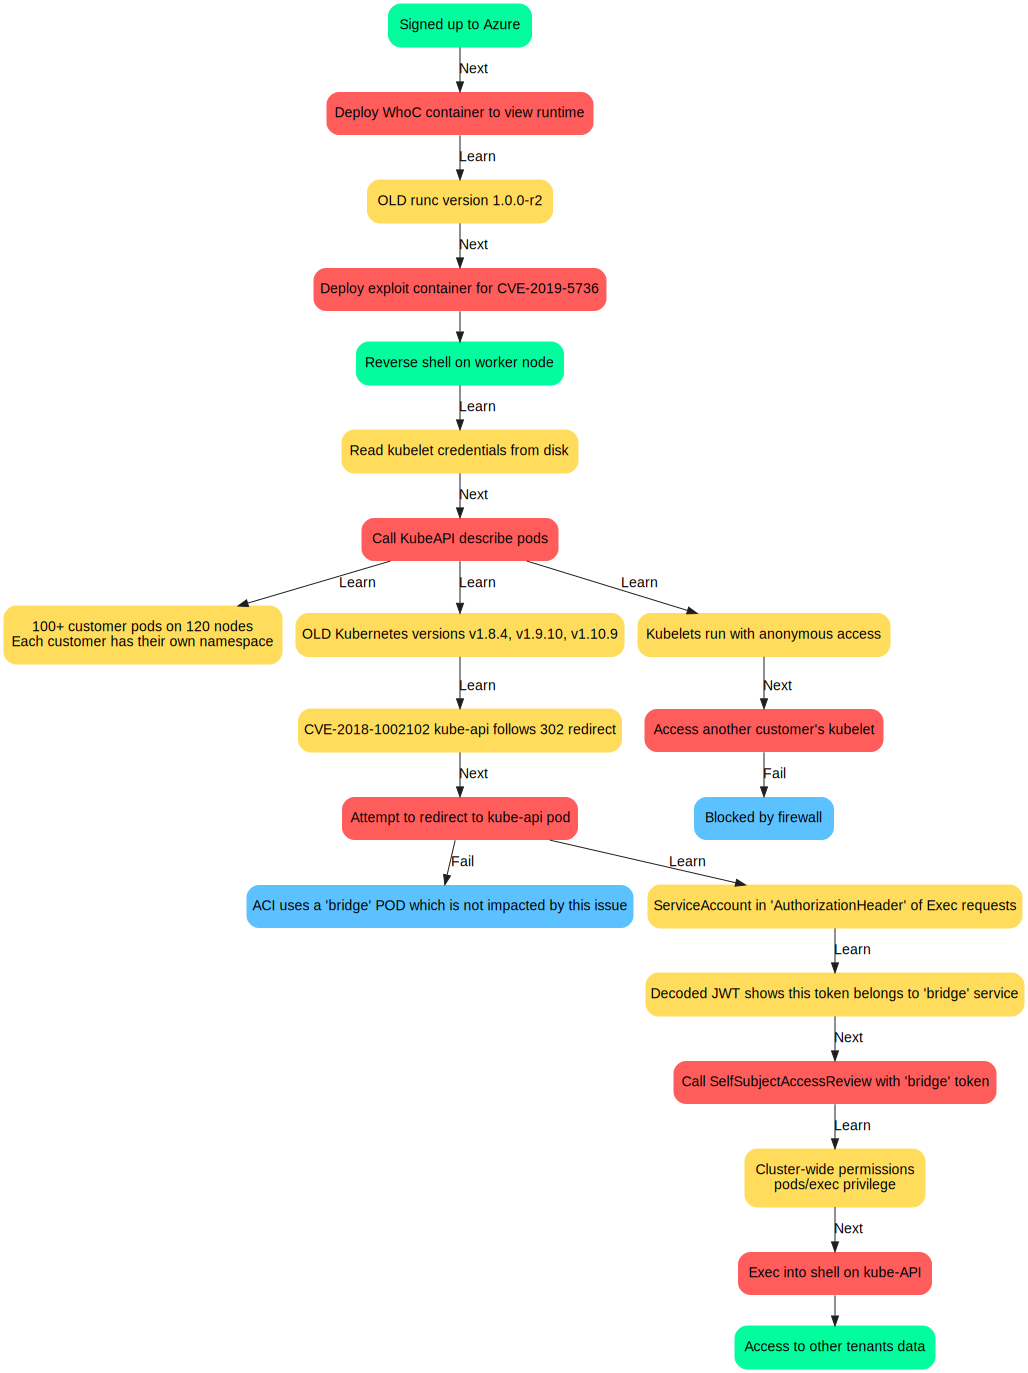

In [3]:
Renderer().buildDot22(root)